# Задача о максимальном потоке сети

Дана сеть. Емкости дуг показаны на рисунке. Найдите максимальный поток, который можно
направить из источника в сток, используя ПО Google OR-Tools. Укажите минимальный разрез

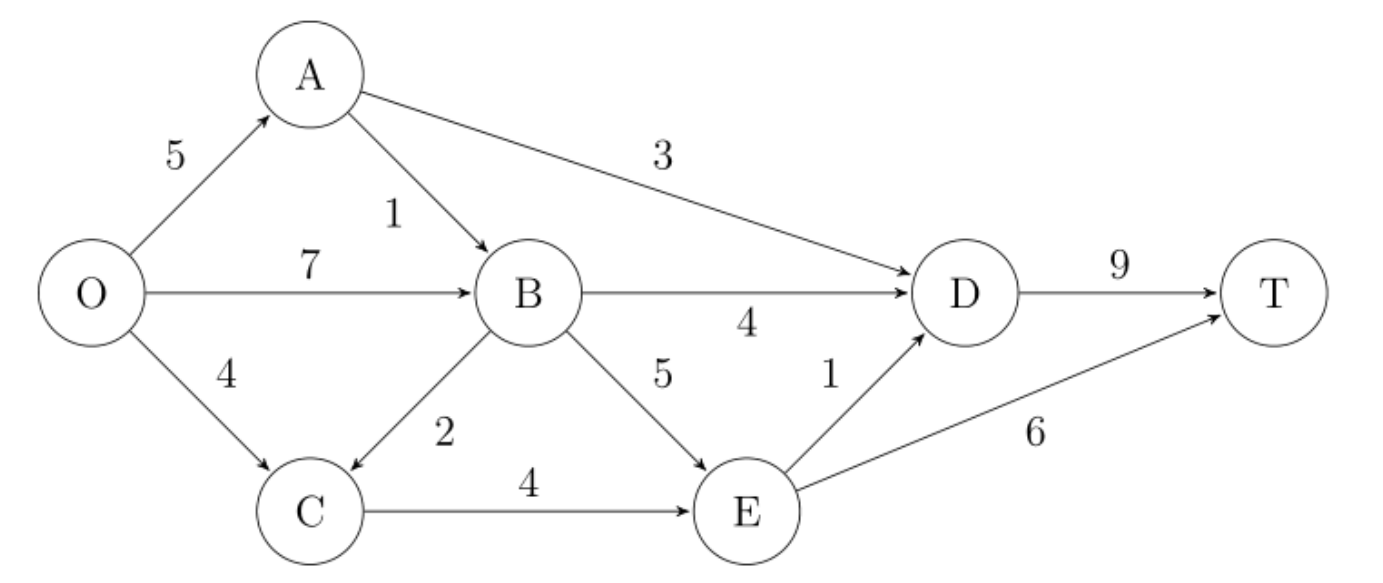

Найдите максимальный поток, который можно направить из O в T.

Для уобства переименуем вершины:

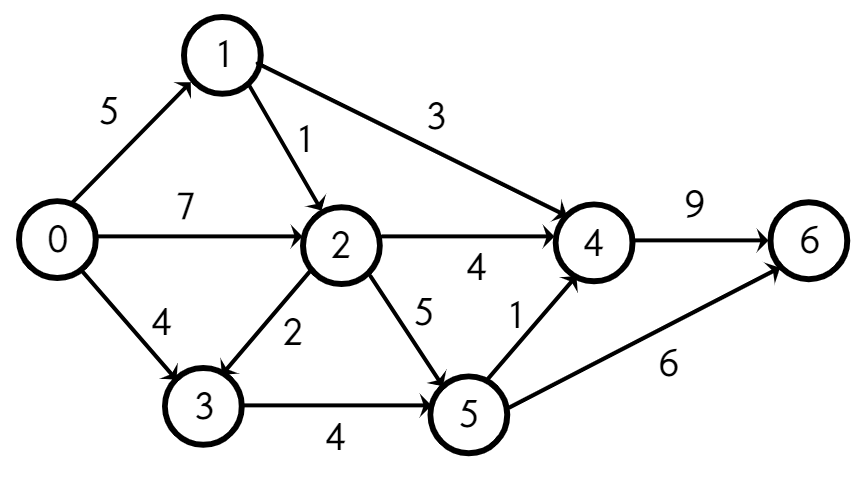

Для решения задачи воспользуемся библиотекой OR-Tools.

In [2]:
#pip install ortools

In [8]:
"""From Taha 'Introduction to Operations Research', example 6.4-2."""
import numpy as np

from ortools.graph.python import max_flow


def max_flow_problem():
    """MaxFlow simple interface example."""
    # Instantiate a SimpleMaxFlow solver.
    smf = max_flow.SimpleMaxFlow()

    # Define three parallel arrays: start_nodes, end_nodes, and the capacities
    # between each pair. For instance, the arc from node 0 to node 1 has a
    # capacity of 20.
    start_nodes = np.array([0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 5, 5])
    end_nodes = np.array(  [1, 2, 3, 2, 4, 3, 4, 5, 5, 6, 4, 6])
    capacities = np.array( [5, 7, 4, 1, 3, 2, 4, 5, 4, 9, 1, 6])

    # Add arcs in bulk.
    #   note: we could have used add_arc_with_capacity(start, end, capacity)
    all_arcs = smf.add_arcs_with_capacity(start_nodes, end_nodes, capacities)

    # Find the maximum flow between node 0 and node 4.
    status = smf.solve(0, 6)

    if status != smf.OPTIMAL:
        print("There was an issue with the max flow input.")
        print(f"Status: {status}")
        exit(1)
    print("Max flow:", smf.optimal_flow())
    print("")
    print(" Arc    Flow / Capacity")
    solution_flows = smf.flows(all_arcs)
    for arc, flow, capacity in zip(all_arcs, solution_flows, capacities):
        print(f"{smf.tail(arc)} / {smf.head(arc)}   {flow:3}  / {capacity:3}")
    print("Source side min-cut:", smf.get_source_side_min_cut())
    print("Sink side min-cut:", smf.get_sink_side_min_cut())

max_flow_problem()

Max flow: 14

 Arc    Flow / Capacity
0 / 1     4  /   5
0 / 2     6  /   7
0 / 3     4  /   4
1 / 2     1  /   1
1 / 4     3  /   3
2 / 3     0  /   2
2 / 4     4  /   4
2 / 5     3  /   5
3 / 5     4  /   4
4 / 6     8  /   9
5 / 4     1  /   1
5 / 6     6  /   6
Source side min-cut: [0, 1, 2, 3, 5]
Sink side min-cut: [6, 4]


В итоге имеем максимальный поток равен 14.

In [1]:
"""From Taha 'Introduction to Operations Research', example 6.4-2."""
import numpy as np

from ortools.graph.python import max_flow


def max_flow_problem():
    """MaxFlow simple interface example."""
    # Instantiate a SimpleMaxFlow solver.
    smf = max_flow.SimpleMaxFlow()

    # Define three parallel arrays: start_nodes, end_nodes, and the capacities
    # between each pair. For instance, the arc from node 0 to node 1 has a
    # capacity of 20.
    start_nodes = np.array([1, 1, 2, 2, 3, 3, 4, 5])
    end_nodes = np.array(  [2, 3, 4, 5, 4, 5, 6, 6])
    capacities = np.array( [6, 4, 3, 2, 2, 5, 6, 4])

    # Add arcs in bulk.
    #   note: we could have used add_arc_with_capacity(start, end, capacity)
    all_arcs = smf.add_arcs_with_capacity(start_nodes, end_nodes, capacities)

    # Find the maximum flow between node 0 and node 4.
    status = smf.solve(1, 6)

    if status != smf.OPTIMAL:
        print("There was an issue with the max flow input.")
        print(f"Status: {status}")
        exit(1)
    print("Max flow:", smf.optimal_flow())
    print("")
    print(" Arc    Flow / Capacity")
    solution_flows = smf.flows(all_arcs)
    for arc, flow, capacity in zip(all_arcs, solution_flows, capacities):
        print(f"{smf.tail(arc)} / {smf.head(arc)}   {flow:3}  / {capacity:3}")
    print("Source side min-cut:", smf.get_source_side_min_cut())
    print("Sink side min-cut:", smf.get_sink_side_min_cut())

max_flow_problem()

Max flow: 9

 Arc    Flow / Capacity
1 / 2     5  /   6
1 / 3     4  /   4
2 / 4     3  /   3
2 / 5     2  /   2
3 / 4     2  /   2
3 / 5     2  /   5
4 / 6     5  /   6
5 / 6     4  /   4
Source side min-cut: [1, 2]
Sink side min-cut: [6, 4]
